# PME3481 - Controle e Aplicações

## Nyquist

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

In [30]:
# Paleta de cores
cp = {
    'red': (1.0, 0.349, 0.369, 1.0),
    'green': (0.541, 0.788, 0.149, 1.0),
    'blue': (0.098, 0.510, 0.769, 1.0),
    'lred': (1.0, 0.588, 0.6, 1.0),
    'lgreen': (0.722, 0.894, 0.443, 1.0),
    'lblue': (0.369, 0.706, 0.918, 1.0),
    'orange': (1.0, 0.506, 0.227, 1.0),
    'yellow': (1.0, 0.792, 0.227, 1.0),
    'pink': (1.0, 0.349, 0.611, 1.0),
    'purple': (0.416, 0.298, 0.576, 1.0),
    'turquoise': (0.098, 0.761, 0.769, 1.0),
    'brown': (0.576, 0.380, 0.298, 1.0)
}

In [31]:
# Definindo a função de transferência G
num = [-9.793, -4.896, 157.7, 78.84]  # Numerador
den = [1, 4, 5.25, 2.75, 0.5]         # Denominador
G = ctl.TransferFunction(num, den)

In [32]:
# Criando linhas de grade verticais no plano xy
x = np.linspace(0, 10.1, 1001)
y = np.linspace(-200, 200, 20000)

# Definindo os valores de alpha das cores das linhas de grade verticais
n = len(x)
ca = -np.log((np.linspace(1, n, n)-0.02)/n)
ca = ca/max(ca)

# Armazenando as linhas de grade verticais em listas
domain_lines = [xi + y * 1j for xi in x]

In [33]:
def plotL(K):
    # FTMA
    L = ctl.tf(K * G)

    # Armazenando as imagens das linhas de grade verticais em listas
    image_lines = [L(line) for line in domain_lines]

    # Gráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # Plotando as linhas de grade verticais no plano domínio
    for i in range(n):
        axes[0].plot(domain_lines[i].real, domain_lines[i].imag,
                    color=cp['yellow'], alpha=ca[i], linewidth=2.5)

    axes[0].plot(domain_lines[0].real, domain_lines[0].imag,
                color=cp['red'], linewidth=2.5)
    axes[0].plot([0, +1, -2, -2], [0, 0, -2*np.sqrt(3), +2*np.sqrt(3)], 'xk')
    axes[0].plot(-1, 0, 'ok', mfc='none')

    axes[0].set_title('Domínio')
    axes[0].set_xlabel('Re(s)')
    axes[0].set_ylabel('Im(s)')
    # axes[0].axhline(0, color='black', linewidth=0.5)
    # axes[0].axvline(0, color='black', linewidth=0.5)
    # axes[0].grid(color='gray', linestyle='--', linewidth=0.5)
    axes[0].set_xlim(-10, 10)
    axes[0].set_ylim(-10, 10)
    axes[0].set_aspect('equal', 'box')

    # Plotando a imagem das linhas de grade verticais após aplicação de L(s)
    for i in range(n):
        axes[1].plot(image_lines[i].real, image_lines[i].imag,
                    color=cp['yellow'], alpha=ca[i], linewidth=2.5)

    axes[1].plot(image_lines[0].real, image_lines[0].imag,
                color=cp['red'], linewidth=2.5)
    axes[1].plot(-1, 0, 'ok')

    axes[1].set_title('Contra-domínio')
    axes[1].set_xlabel('Re(L(s))')
    axes[1].set_ylabel('Im(L(s))')
    # axes[1].axhline(0, color='black', linewidth=0.5)
    # axes[1].axvline(0, color='black', linewidth=0.5)
    # axes[1].grid(color='gray', linestyle='--', linewidth=0.5)
    axes[1].set_xlim(-2, 1)
    axes[1].set_ylim(-1.5, 1.5)
    axes[1].set_aspect('equal', 'box')

    plt.tight_layout()
    plt.show()

Gain Margin (GM): 0.058604504728763565 dB
Phase Margin (PM): -71.70725140548602 degrees


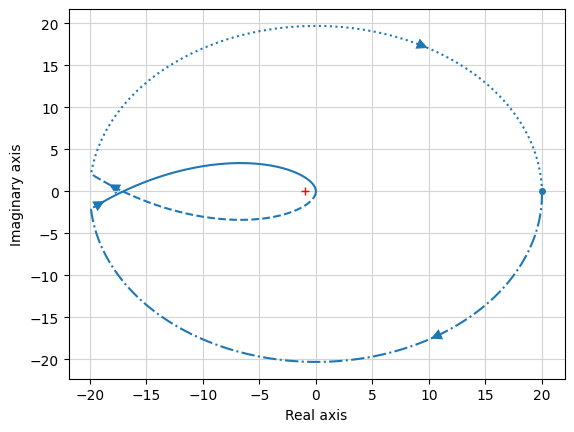

In [36]:
# Plotar o diagrama de Nyquist
ctl.nyquist_plot(G)

# Calcular a margem de fase atual
gm, pm, wg, wp = ctl.margin(G)
print(f'Gain Margin (GM): {gm} dB')
print(f'Phase Margin (PM): {pm} degrees')

plt.show()

Gain Margin (GM): 0.058604504728763565 dB
Phase Margin (PM): -71.70725140548602 degrees


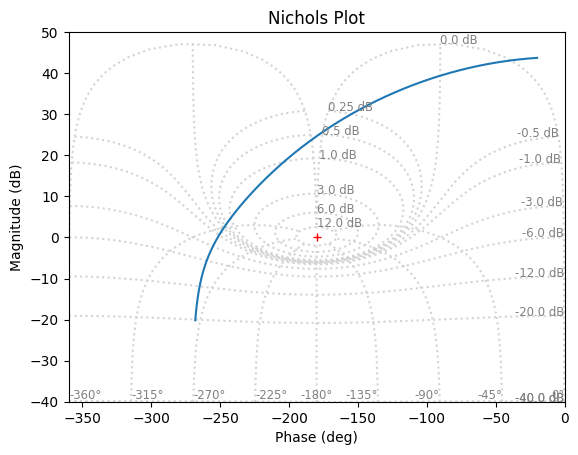

In [37]:
# Plotar o diagrama de Nyquist
ctl.nichols_plot(G)

# Calcular a margem de fase atual
gm, pm, wg, wp = ctl.margin(G)
print(f'Gain Margin (GM): {gm} dB')
print(f'Phase Margin (PM): {pm} degrees')

plt.show()